<a href="https://colab.research.google.com/github/Ananyakumar186/TSF-intern-tasks/blob/main/Finding_Optimum_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ananya Kumar**

**Graduate Rotational Internship Program**

**The Sparks Foundations**

**Task-2 Using K-Means Clustering , visualing the dataset of iris**


In [2]:
#import the librariries requried fot this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
#import the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(151)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now to Find the optimum numer of clusters in the dataset , I plot the graph to locate the elbow for K-Means Clustering classification

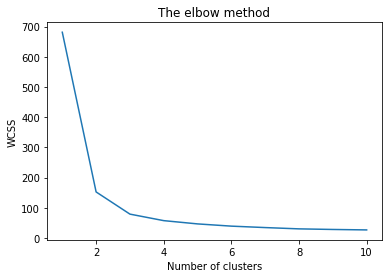

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

As you can see clearly from the above graph that the elbow has been formed around 3 , which is our optimum numer of clusters which is present .
This is used for K-Means clustering prediction. As WCSS doesnt decrease.

In [11]:
#Now I apply the kmeans for the datset and write a code for prediciton
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=None)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


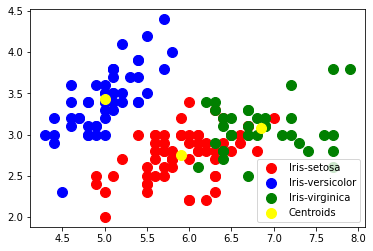

In [13]:
#Now to visualize the clusters formed.
plt.scatter(x[y_kmeans==0,0] , x[y_kmeans ==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0] , x[y_kmeans==1,1], s=100 , c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0] , x[y_kmeans==2,1] , s=100 ,c='green',label='Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()


As you can see in the above by using the k-means clustering model , you can classify the datasets into three types, by using colors as above.
The centroids of those data is represented in yellow, which determines what kind of data is present in the clusters formed around it.
